<a href="https://colab.research.google.com/github/turna1/3D-LLM/blob/main/picovoice_job_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem-1:**
The probability of rain on a given calendar day in Vancouver is p[i], where i is the day's index. For example, p[0] is the probability of rain on January 1st, and p[10] is the probability of precipitation on January 11th. Assume the year has 365 days (i.e., p has 365 elements). What is the chance it rains more than n (e.g., 100) days in Vancouver? Write a function that accepts p (probabilities of rain on a given calendar day) and n as input arguments and returns the possibility of raining at least n days.

In [61]:
from typing import Sequence

def prob_rain_more_than_n(p: Sequence[float], n: int) -> float:
    days = len(p)
    dp = [0.0] * (days + 1)
    dp[0] = 1.0  # probability of 0 rainy days before starting

    for i in range(days):
        new_dp = [0.0] * (days + 1)
        for k in range(i + 1):
            new_dp[k] += dp[k] * (1 - p[i])      # no rain
            new_dp[k + 1] += dp[k] * p[i]        # rain
        dp = new_dp

    return sum(dp[n + 1:])  #probability of more than n rainy days


In [62]:
#test assuming 20% chance every day
p = [0.2] * 365
print(prob_rain_more_than_n(p, 100))


0.0002636617393087031


**Problem 2:**
phoneme is a sound unit (similar to a character for text). We have an extensive pronunciation dictionary (think millions of words). Below is a snippet: ABACUS AE B AH K AH S BOOK B UH K THEIR DH EH R THERE DH EH R TOMATO T AH M AA T OW TOMATO T AH M EY T OW
Given a sequence of phonemes as input (e.g. ["DH", "EH", "R", "DH", "EH", "R"]), find all the combinations of the words that can produce this sequence (e.g. [["THEIR", "THEIR"], ["THEIR", "THERE"], ["THERE", "THEIR"], ["THERE", "THERE"]]). You can preprocess the dictionary into a different data structure if needed

In [27]:
from typing import List, Tuple, Dict, Sequence
from collections import defaultdict

PRONUNCIATION_DICT = [
    ("ABACUS", ["AE", "B", "AH", "K", "AH", "S"]),
    ("BOOK", ["B", "UH", "K"]),
    ("THEIR", ["DH", "EH", "R"]),
    ("THERE", ["DH", "EH", "R"]),
    ("TOMATO", ["T", "AH", "M", "AA", "T", "OW"]),
    ("TOMATO", ["T", "AH", "M", "EY", "T", "OW"]),
]

  # preprocessing dict as phoneme tuples to words mapping
def find_word_combos_with_pronunciation(phonemes: Sequence[str]) -> List[List[str]]:

    phoneme_to_words: Dict[Tuple[str, ...], List[str]] = defaultdict(list)
    for word, phonemes_seq in PRONUNCIATION_DICT:
        phoneme_to_words[tuple(phonemes_seq)].append(word)

    # memoization and search
    memo = {}

    def dfs(start: int) -> List[List[str]]:
        if start == len(phonemes):
            return [[]]  # empty combination is valid
        if start in memo:
            return memo[start]

        results = []
        for end in range(start + 1, len(phonemes) + 1):
            chunk = tuple(phonemes[start:end])
            if chunk in phoneme_to_words:
                for word in phoneme_to_words[chunk]:
                    for rest in dfs(end):
                        results.append([word] + rest)

        memo[start] = results
        return results

    return dfs(0)



In [63]:
#test for given input
result = find_word_combos_with_pronunciation(["DH", "EH", "R", "DH", "EH", "R"])
for combo in result:
    print(combo)


['THEIR', 'THEIR']
['THEIR', 'THERE']
['THERE', 'THEIR']
['THERE', 'THERE']


**Problem 3:** Find the n most frequent words in the TensorFlow Shakespeare dataset.

# **Soultion in Python**

In [47]:
# import necessary libraries
import requests
import seaborn as sns
import matplotlib.pyplot as plt




In [48]:
#get the dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt"
response = requests.get(url)
text = response.text


In [49]:
#import libraries
import re
from collections import Counter




In [51]:
#tokenize and lowercase all words
words = re.findall(r'\b\w+\b', text.lower())



In [52]:
# count word frequencies
counter = Counter(words)



In [60]:
#print top n most frequent words
n = int(input("Please input the value of n: ") or 10)
print(f"Top {n} most frequent words:\n")
for word, freq in counter.most_common(n):
    print(f"{word}: {freq}")

Please input the value of n: 10
Top 10 most frequent words:

the: 6287
and: 5690
i: 5111
to: 4934
of: 3760
you: 3211
my: 3120
a: 3018
that: 2664
in: 2403


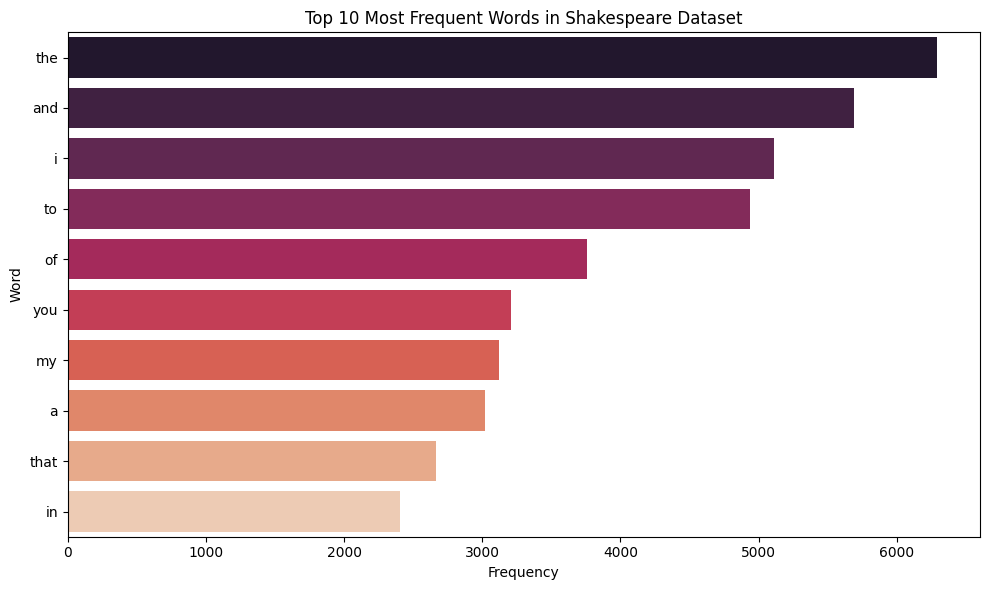

In [67]:
# visualize the top N most frequent words
top_words = counter.most_common(n)
words, freqs = zip(*top_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(freqs), y=list(words), hue=list(words), dodge=False, palette="rocket", legend=False)
plt.title(f"Top {n} Most Frequent Words in Shakespeare Dataset")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


# **Soultion in C**

In [ ]:
# Download the Shakespeare dataset
!wget -O shakespeare.txt https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt

# Download uthash.h (single-header hash table library for C)
!wget -O uthash.h https://raw.githubusercontent.com/troydhanson/uthash/master/src/uthash.h


--2025-04-10 20:57:44--  https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 173.194.216.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘shakespeare.txt’

shakespeare.txt     100%[===================>]   1.06M  --.-KB/s    in 0.01s   

2025-04-10 20:57:44 (105 MB/s) - ‘shakespeare.txt’ saved [1115394/1115394]

--2025-04-10 20:57:44--  https://raw.githubusercontent.com/troydhanson/uthash/master/src/uthash.h
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73749 (72K) [text/plain]
Saving to: ‘u

In [ ]:
%%writefile find_freq.c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <ctype.h>
#include <stdint.h>
#include "uthash.h"

#define MAX_WORD_LEN 100

typedef struct {
    char word[MAX_WORD_LEN];
    int count;
    UT_hash_handle hh;
} WordEntry;

int cmp(const void *a, const void *b) {
    WordEntry *wa = *(WordEntry **)a;
    WordEntry *wb = *(WordEntry **)b;
    return wb->count - wa->count;
}

void to_lowercase(char *str) {
    for (int i = 0; str[i]; i++)
        str[i] = tolower(str[i]);
}

char **find_frequent_words(const char *path, int32_t n) {
    FILE *fp = fopen(path, "r");
    if (!fp) {
        perror("File open failed");
        return NULL;
    }
     // Clean word: lowercase, remove punctuation
    WordEntry *words = NULL, *entry;
    char buf[MAX_WORD_LEN];
    while (fscanf(fp, "%99s", buf) == 1) {
        int len = strlen(buf);
        int k = 0;
        for (int i = 0; i < len; i++) {
            if (isalpha(buf[i]))
                buf[k++] = tolower(buf[i]);
        }
        buf[k] = '\0';
        if (k == 0) continue;

        HASH_FIND_STR(words, buf, entry);
        if (!entry) {
            entry = malloc(sizeof(WordEntry));
            strncpy(entry->word, buf, MAX_WORD_LEN);
            entry->count = 1;
            HASH_ADD_STR(words, word, entry);
        } else {
            entry->count++;
        }
    }
    fclose(fp);


    int total = HASH_COUNT(words);
    WordEntry **array = malloc(total * sizeof(WordEntry *));
    WordEntry *cur;
    int i = 0;
    for (cur = words; cur != NULL; cur = cur->hh.next)
        array[i++] = cur;

    qsort(array, total, sizeof(WordEntry *), cmp);

    printf("Top %d frequent words:\n", n);
    for (i = 0; i < n && i < total; i++)
        printf("%s: %d\n", array[i]->word, array[i]->count);

    return NULL;
}

int main() {
    find_frequent_words("shakespeare.txt", 10);
    return 0;
}


Writing find_freq.c


In [ ]:
!gcc find_freq.c -o find_freq
!./find_freq


Top 10 frequent words:
the: 6283
and: 5680
to: 4766
i: 4653
of: 3757
you: 3142
my: 3118
a: 2987
that: 2569
in: 2362
